# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Transformações-de-intensidade" data-toc-modified-id="Transformações-de-intensidade-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transformações de intensidade</a></div><div class="lev2 toc-item"><a href="#Descrição" data-toc-modified-id="Descrição-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descrição</a></div><div class="lev2 toc-item"><a href="#Indexação-por-arrays" data-toc-modified-id="Indexação-por-arrays-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Indexação por arrays</a></div><div class="lev2 toc-item"><a href="#Utilização-em-imagens" data-toc-modified-id="Utilização-em-imagens-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Utilização em imagens</a></div><div class="lev3 toc-item"><a href="#T1:-Função-identidade" data-toc-modified-id="T1:-Função-identidade-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>T1: Função identidade</a></div><div class="lev3 toc-item"><a href="#T2:-Função-logaritmica" data-toc-modified-id="T2:-Função-logaritmica-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>T2: Função logaritmica</a></div><div class="lev3 toc-item"><a href="#T3:-Função-negativo" data-toc-modified-id="T3:-Função-negativo-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>T3: Função negativo</a></div><div class="lev3 toc-item"><a href="#T4:-Função-threshold-128" data-toc-modified-id="T4:-Função-threshold-128-134"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>T4: Função threshold 128</a></div><div class="lev3 toc-item"><a href="#T5:-Função-quantização" data-toc-modified-id="T5:-Função-quantização-135"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>T5: Função quantização</a></div><div class="lev2 toc-item"><a href="#Outras-página-da-toolbox" data-toc-modified-id="Outras-página-da-toolbox-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Outras página da toolbox</a></div>

# Transformações de intensidade

## Descrição

Transformações de intensidade modificam o valor do pixel de acordo com uma
equação ou mapeamento. Estas transformações são ditas pontuais para contrastar
com operações ditas de vizinhança. Um exemplo de transformação de intensidade
é uma operação que divide o valor dos pixels por 2. O resultado será uma nova
imagem onde todos os pixels serão mais escuros.

A transformação de intensidade tem a forma $s = T(v)$, onde $v$ é um valor de nível
de cinza de entrada e s é o valor de nível de cinza na saída. Este tipo de 
mapeamento pode apresentar muitas denominações: transformação de contraste,
lookup table, tabela ou mapa de cores, etc. A transformação T pode ser implementada
por uma função ou através de uma simples tabela de mapeamento.
O NumPy possui um forma elegante e eficiente de se aplicar
um mapeamento de intensidade a uma imagem. 

## Indexação por arrays

O ``ndarray`` pode ser indexado por outros ``ndarrays``. O uso de arrays como índice
podem ser simples mas também bastante complexos e difíceis de entender. O uso de
arrays indexados retornam sempre uma cópia dos dados originais e não uma visão ou
cópia rasa normalmente obtida com o *slicing*. Assim, o uso de arrays indexados devem
ser utilizados com precaução pois podem gerar códigos não tão eficientes.

Veja um exemplo numérico unidimensional simples. Um vetor ``row`` de 10 elementos de 0 a 90
é criado e um outro vetor de indices ``i`` com valores [3,5,0,8] irá indexar ``row``
na forma ``row[i]``. O resultado será [30,50,0,80] que são os elementos de ``row`` indexados por ``i``:
 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
sys.path.append( '../master' )
from function import normalize
from function import histogram

O indexador `i` precisa ser inteiro. Entretanto o array que será indexado pode ser qualquer tipo.

`f = row[i]`

- shape(f) é igual ao shape(i)
- dtype(f) é o dtype(row)

In [2]:
row = np.arange(0.,100,10)
print('row:', row)
i = np.array([[3,5,0,8],[4,2,7,1]])
f = row[i]
print('i:', i)
print('f=row[i]\n',f)
print(id(i),id(row),id(f))

row: [ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
i: [[3 5 0 8]
 [4 2 7 1]]
f=row[i]
 [[30. 50.  0. 80.]
 [40. 20. 70. 10.]]
139760393550320 139760393550896 139760393550128


Vejamos agora o caso bidimensional, apropriado para imagens e a transformação de intensidade.
Seja uma imagem ``f`` de dimensões ``(2,3)`` com os valores de pixels variando de 0 a 2:
    

In [3]:
f = np.array([[0, 1, 2],
              [2, 0, 1]])
print('f=\n',f)

f=
 [[0 1 2]
 [2 0 1]]


Seja agora a transformação de intensidade ``T``, especificada por um vetor de 3 elementos, onde
T[0] = 5; T[1] = 6 e T[2] = 7:

In [4]:
T = np.array([5, 6, 7])
print('T:', T)
for i in np.arange(T.size):
    print('%d:%d'% (i,T[i]))

T: [5 6 7]
0:5
1:6
2:7


A aplicação da transformação de intensidade é feita utilizando-se a imagem ``f`` como índice da
transformação T, como se escreve na equação matemática:

In [5]:
g = T[f]
print('g=T[f]= \n', g)
print('g.shape:', g.shape)

g=T[f]= 
 [[5 6 7]
 [7 5 6]]
g.shape: (2, 3)


Note que ``T[f]`` tem as mesmas dimensões de ``f``, entretanto, seus pixels passaram pelo
mapeamento da tabela ``T``.

## Utilização em imagens

Existem muitas funções úteis que podem ser feitas com o mapeamento T: realce de contraste, equalização de
histograma, thresholding, redução de níveis de cinza, negativo da imagem, entre várias outras.

É comum representar a tabela de transformação de intensidade em um gráfico. A seguir várias funções de
transformações são calculadas:

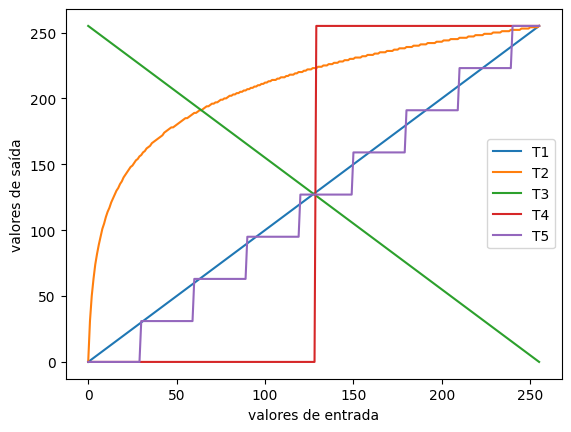

In [6]:
T1 = np.arange(256).astype('uint8') # função identidade
T2 = normalize.normalize(np.log(T1+1.)) # logaritmica - realce partes escuras
T3 = 255 - T1 # negativo
T4 = normalize.normalize(T1 > 128) # threshold 128
T5 = normalize.normalize(T1//30) # reduz o número de níveis de cinza
plt.plot(T1)
plt.plot(T2)
plt.plot(T3)
plt.plot(T4)
plt.plot(T5)
plt.legend(['T1', 'T2', 'T3', 'T4','T5'], loc='right')
plt.xlabel('valores de entrada')
plt.ylabel('valores de saída')
plt.show()

Veja a aplicação destas tabelas na imagem "cameraman.tif":

### T1: Função identidade

Text(0.5, 1.0, 'T1[f]')

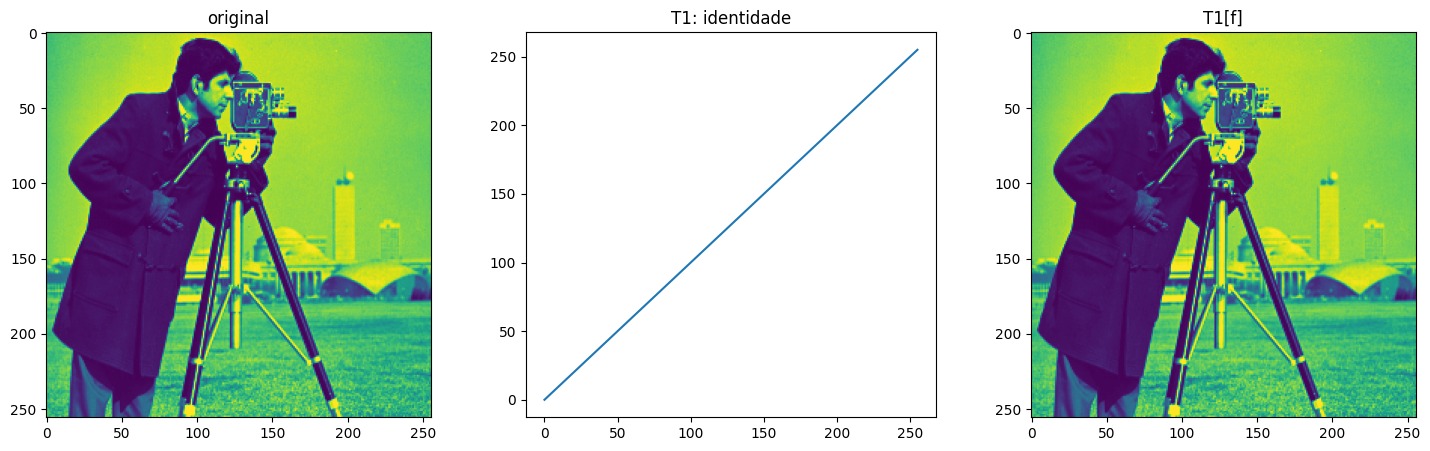

In [7]:
fig, axs = plt.subplots(1,3, figsize=(18, 5))
f = mpimg.imread('../data/cameraman.tif')

plt.subplot(131)
plt.imshow(f)
plt.title('original')

plt.subplot(132)
plt.plot(T1)
plt.title('T1: identidade')

plt.subplot(133)
f1 = T1[f]
plt.imshow(f1)
plt.title('T1[f]')


### T2: Função logaritmica

Text(0.5, 1.0, 'T2[f]')

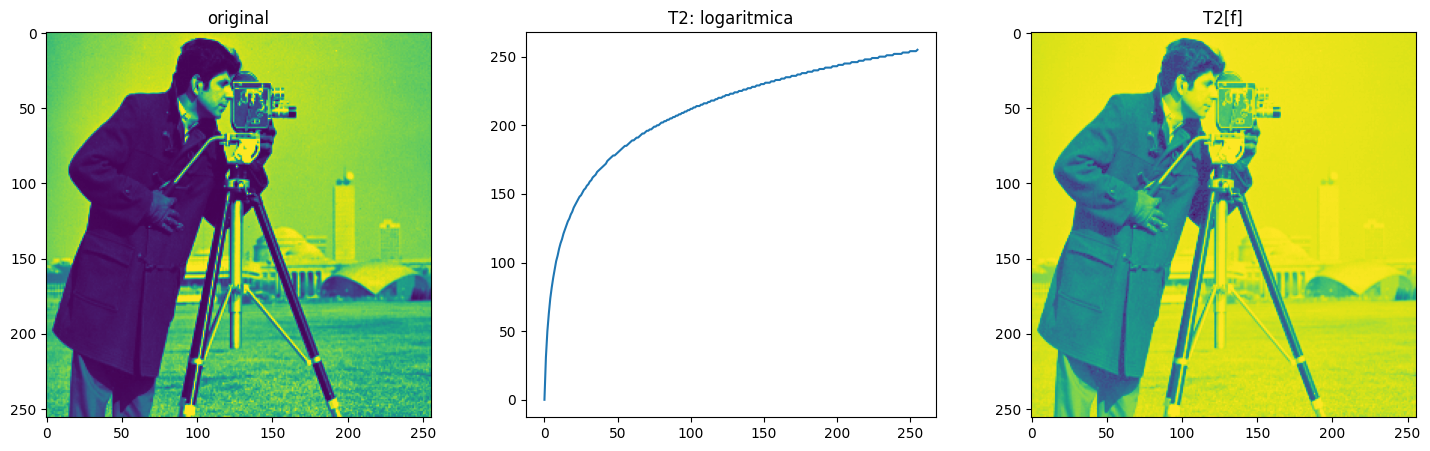

In [8]:
fig, axs = plt.subplots(1,3, figsize=(18, 5))

plt.subplot(131)
plt.imshow(f)
plt.title('original')

plt.subplot(132)
plt.plot(T2)
plt.title('T2: logaritmica')

plt.subplot(133)
f2 = T2[f]
plt.imshow(f2)
plt.title('T2[f]')


### T3: Função negativo

Text(0.5, 1.0, 'T3[f]')

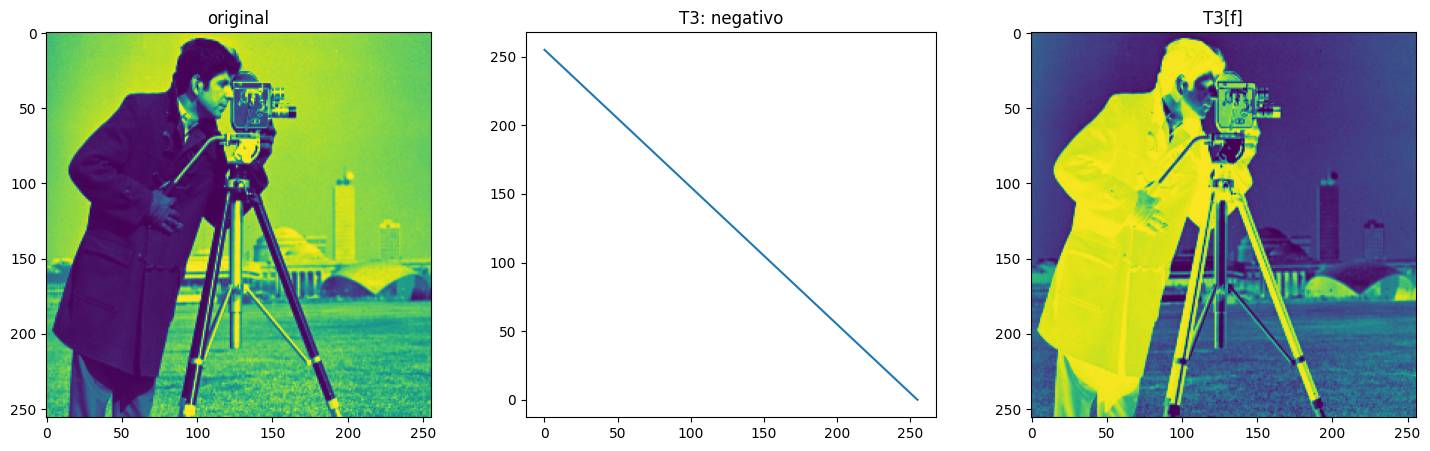

In [9]:
fig, axs = plt.subplots(1,3, figsize=(18, 5))

plt.subplot(131)
plt.imshow(f)
plt.title('original')

plt.subplot(132)
plt.plot(T3)
plt.title('T3: negativo')

plt.subplot(133)
f3 = T3[f]
plt.imshow(f3)
plt.title('T3[f]')

### T4: Função threshold 128

Text(0.5, 1.0, 'T4[f]')

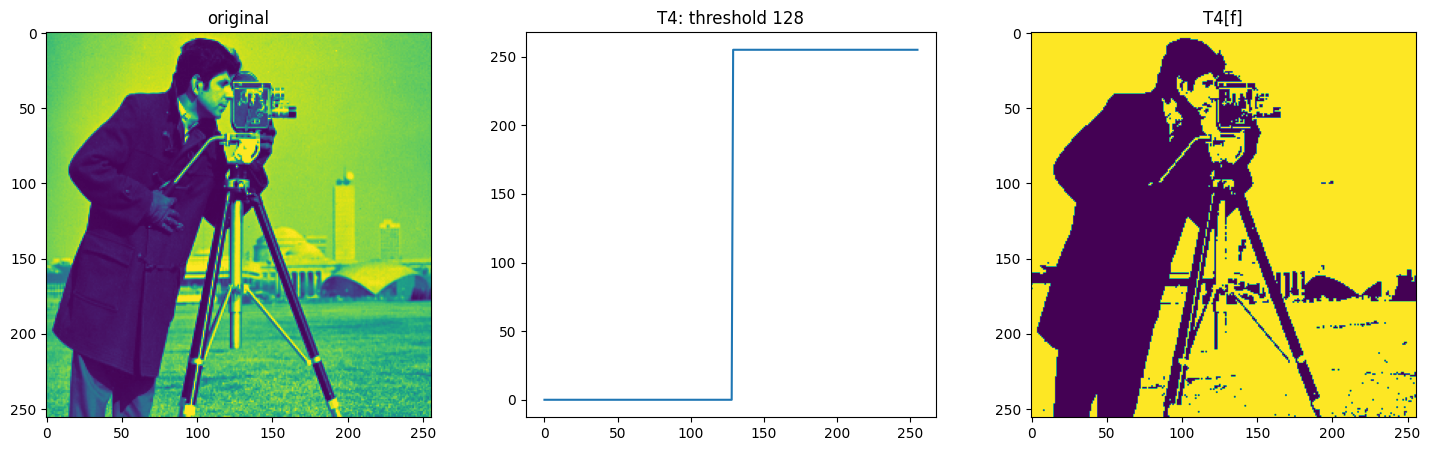

In [10]:
fig, axs = plt.subplots(1,3, figsize=(18, 5))

plt.subplot(131)
plt.imshow(f)
plt.title('original')

plt.subplot(132)
plt.plot(T4)
plt.title('T4: threshold 128')

plt.subplot(133)
f4 = T4[f]
plt.imshow(f4)
plt.title('T4[f]')

### T5: Função quantização

Text(0.5, 1.0, 'T5[f]')

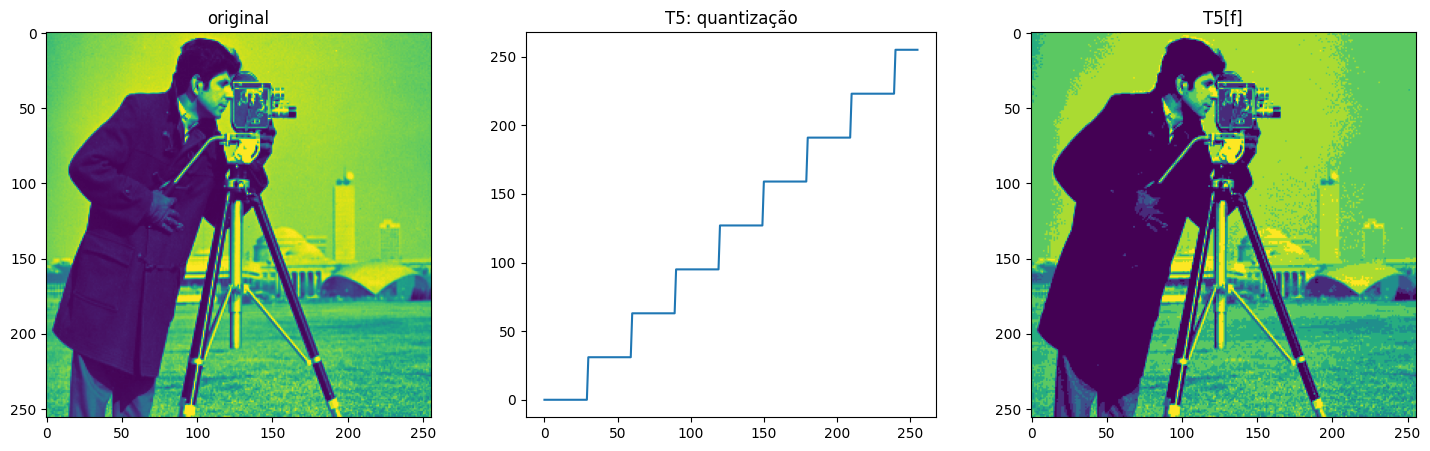

In [11]:
fig, axs = plt.subplots(1,3, figsize=(18, 5))

plt.subplot(131)
plt.imshow(f)
plt.title('original')

plt.subplot(132)
plt.plot(T5)
plt.title('T5: quantização')

plt.subplot(133)
f5 = T5[f]
plt.imshow(f5)
plt.title('T5[f]')

Observando o histograma de cada imagem após o mapaemento:

<module 'matplotlib.pyplot' from '/home/ic-unicamp/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

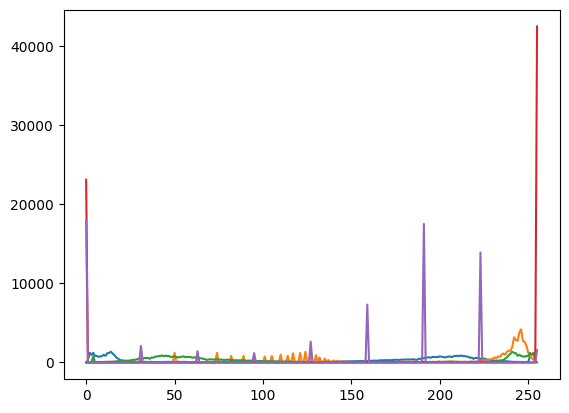

In [12]:
h  = histogram.histogram(f)
h2 = histogram.histogram(f2) #logaritmica
h3 = histogram.histogram(f3) # negativo
h4 = histogram.histogram(f4) # threshold
h5 = histogram.histogram(f5) # quantização
plt.plot(h)
plt.plot(h2)
plt.plot(h3)
plt.plot(h4)
plt.plot(h5)
plt

Do ponto de vista de eficiência, qual é o melhor, utilizar o mapeamento pela tabela, ou processar a imagem diretamente?

In [13]:
f = normalize.normalize(np.arange(1000000).reshape(1000,1000))

In [14]:
%timeit g2t = T2[f]
%timeit g2 = normalize.normalize(np.log(f+1.))

1.95 ms ± 27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
7.95 ms ± 572 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
%timeit g3t = T3[f]
%timeit g3 = 255 - f

1.98 ms ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
40.7 µs ± 457 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


T pode ser denominado como função de transferência de intensidade. Quando a derivada de T for maior que 1, o contraste é aumentado naqueles valores de T, se for menor que 1, o contraste é diminuído. Caso a derivada for negativa, existe uma quebra de ordenação dos valores.

Se T for uma função crescente, isto é:

$$ T(i) >= T(j) \ \text{ se }\  i > j $$

Então aplicando-se `g = T[f]`, a propriedade 

$$ f(r,c) >= f(r1,c1)\ \text{então}\ g(r,c) >= g(r1,c1) $$